In [22]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import matplotlib.pyplot as plt

<h3>Web Scraping</h3>

In [23]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_Japanese_companies'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [24]:
#find correct html tag for table 
dataTable = soup.find_all('table')[1]
header = dataTable.find_all('th')
#print(header)

<h4>Striping the column headers from the website</h4>

In [25]:
listData = [data.text.strip() for data in header]
print(listData)

['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters', 'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)', 'Industry']


In [26]:
#Converting 'listData' to a dataframe
df = pd.DataFrame(columns=listData)
df

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry


<h4>Extracting the data from the dataset</h4>

In [27]:
columnData = dataTable.find_all('tr')

In [28]:
for value in columnData[1:]:
    rowData = value.find_all('td')
    eachRow = [data.text.strip() for data in rowData]
    
    length = len(df)
    df.loc[length] = eachRow

In [29]:
df

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,10,Toyota,Toyota,281.75,28.15,552.46,237.73,Automotive
1,2,44,SoftBank Group,Tokyo,96.86,20.87,418.94,71.69,Conglomerate
2,3,52,Nippon Telegraph and Telephone,Tokyo,110.39,10.15,204.46,103.98,Telecommunications
3,4,56,Sony,Tokyo,89.90,7.99,260.48,108.84,Conglomerate
4,4,59,Mitsubishi UFJ Financial Group,Tokyo,48.29,11.29,"3,176.37",75.75,Financials
5,5,103,Honda,Tokyo,130.16,7.24,193.22,44.99,Automotive
6,6,104,Mitsubishi,Tokyo,146.94,5.90,178.13,50.87,Conglomerate
7,7,127,Sumitomo Mitsui Financial Group,Tokyo,35.50,6.40,"2,176.62",42.33,Banking
8,8,140,Mitsui,Tokyo,65.50,3.70,114.30,24.10,Conglomerate
9,9,141,Itochu,Osaka,107.99,6.52,102.18,45.95,Trading


<h3>Data Analysis</h3>

In [30]:
#setting the index to Rank
dfNew = df.set_index('Rank')

<h4>Finding top profitable companies</h4>

In [31]:
#changing object type to numeric type 
dfNew['Profit(billions US$)'] = pd.to_numeric(dfNew['Profit(billions US$)'], errors='coerce')
#sorting the data by highest profit
dfProfit = dfNew.nlargest(5, 'Profit(billions US$)')
dfProfit

,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
Rank,,,,,,,,
1,10,Toyota,Toyota,281.75,28.15,552.46,237.73,Automotive
2,44,SoftBank Group,Tokyo,96.86,20.87,418.94,71.69,Conglomerate
4,59,Mitsubishi UFJ Financial Group,Tokyo,48.29,11.29,"3,176.37",75.75,Financials
3,52,Nippon Telegraph and Telephone,Tokyo,110.39,10.15,204.46,103.98,Telecommunications
4,56,Sony,Tokyo,89.90,7.99,260.48,108.84,Conglomerate


<h3>Data Visualization</h3>

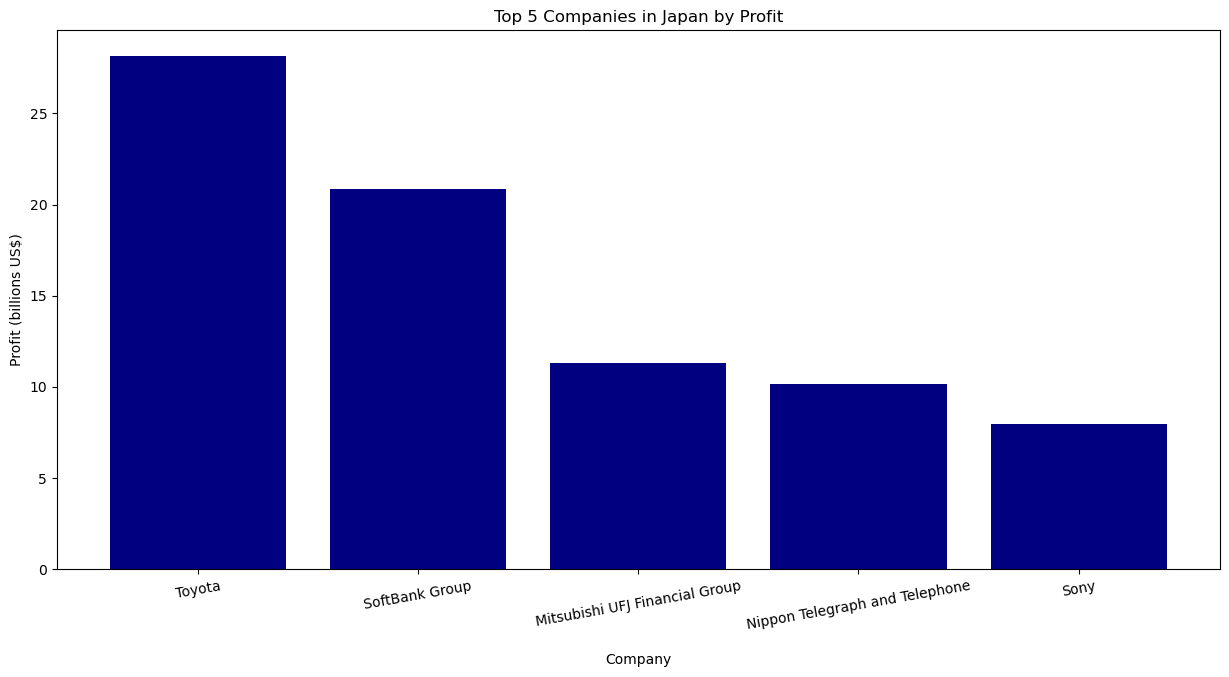

In [32]:
#Creating the most profitable graph

plt.figure(figsize=(15,7))
plt.title('Top 5 Companies in Japan by Profit')
plt.bar(dfProfit['Name'], dfProfit['Profit(billions US$)'], color='navy')
plt.ylabel('Profit (billions US$)')
plt.xlabel('Company', labelpad=15)
plt.xticks(rotation=10)
plt.show()

<h4>Finding top industries in Japan</h4>

In [33]:
industryCount = dfNew['Industry'].value_counts()
industryCount

Industry
Automotive                6
Conglomerate              6
Trading                   4
Insurance                 4
Electronics               4
Financials                3
Electronic                3
Telecommunications        2
Banking                   2
Retail                    2
Real estate               2
Construction              1
Agricultural machinery    1
Consumer goods            1
Industrials               1
Video game                1
Chemicals                 1
Machinery                 1
Electrical equipment      1
Oil and Gas               1
Tobacco                   1
Steel                     1
Pharmaceuticals           1
Beverage                  1
Name: count, dtype: int64

In [34]:
#Changing the series to dataframe
dfIndustry = pd.DataFrame(industryCount)
dfIndustry

,count
Industry,
Automotive,6
Conglomerate,6
Trading,4
Insurance,4
Electronics,4
Financials,3
Electronic,3
Telecommunications,2
Banking,2


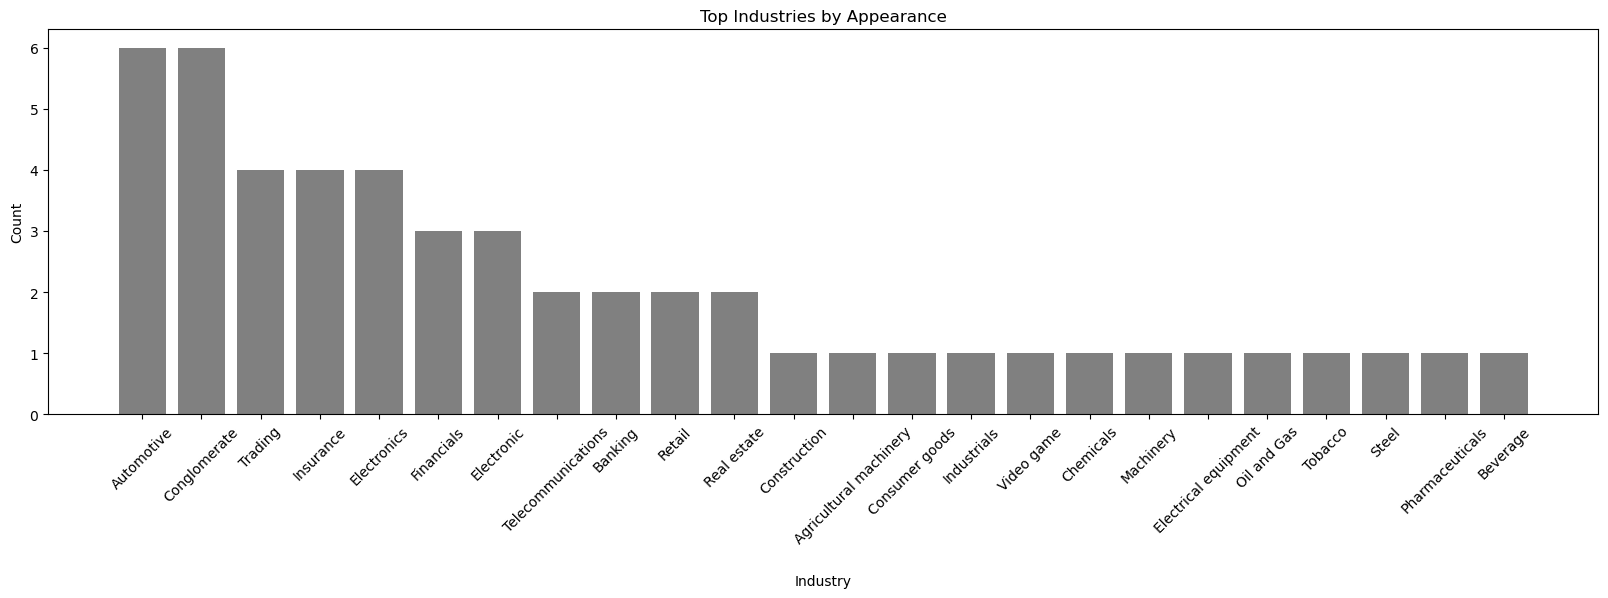

In [35]:
#Creating the graph of top industries
plt.figure(figsize=(20,5))
plt.title('Top Industries by Appearance')
plt.bar(dfIndustry.index, dfIndustry['count'], color = 'grey')
plt.ylabel('Count')
plt.xlabel('Industry', labelpad=20)
plt.xticks(rotation=45)
plt.show()